<a href="https://colab.research.google.com/github/syedtazmeer/Resnet/blob/main/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [15]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Programs/Tomato dataset/train'
valid_path = '/content/drive/MyDrive/Programs/Tomato dataset/valid'

In [16]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [17]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [18]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Programs/Tomato dataset/train/*')

In [19]:
folders

['/content/drive/MyDrive/Programs/Tomato dataset/train/Tomato___healthy',
 '/content/drive/MyDrive/Programs/Tomato dataset/train/Tomato___Early_blight',
 '/content/drive/MyDrive/Programs/Tomato dataset/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/Programs/Tomato dataset/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Programs/Tomato dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Programs/Tomato dataset/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/Programs/Tomato dataset/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Programs/Tomato dataset/train/Tomato___Late_blight',
 '/content/drive/MyDrive/Programs/Tomato dataset/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/Programs/Tomato dataset/train/Tomato___Septoria_leaf_spot']

In [20]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [21]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

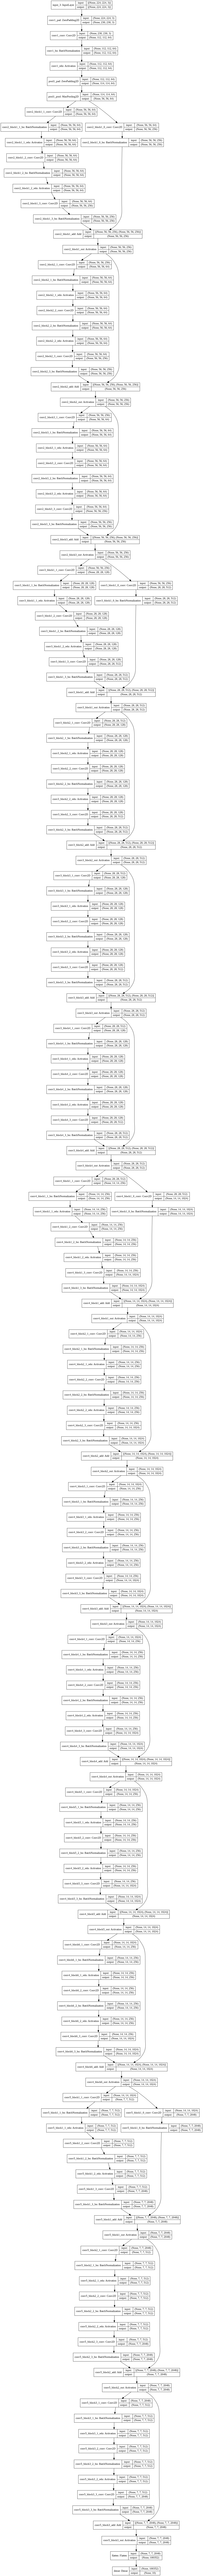

In [22]:
# view the structure of the model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='resnet_module.png')

In [23]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [24]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Programs/Tomato dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18355 images belonging to 10 classes.


In [26]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Programs/Tomato dataset/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4605 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
  6/574 [..............................] - ETA: 2:41:38 - loss: 7.2207 - accuracy: 0.1398